# Beginning the Data Engineering process in Machine Learning

### Reading the Training File

In [1]:
import pandas as pd
df_BM = pd.read_csv('knn.csv')
df_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# LETS DO BASIC DATA ANALYSIS

In [2]:
print(df_BM.shape)

df_BM.columns


(8523, 12)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
import pandas as pd
df_BM = pd.read_csv('knn.csv')

print(df_BM.shape)

(8523, 12)


In [4]:
df_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Getting the Summary

In [5]:
df_BM.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df_BM.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Impute Missing Values

In [8]:
df_BM.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean_wt = df_BM['Item_Weight'].mean() #imputing item_weight with mean
df_BM['Item_Weight'].fillna(mean_wt, inplace =True)

mode_Outlet = df_BM['Outlet_Size'].mode() #imputing outlet size with mode
df_BM['Outlet_Size'].fillna(mode_Outlet[0], inplace =True)

df_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df_BM.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Dealing with the Categorical Variables REPLACING CATEGORIES TO NUMERICAL VALUES

In [12]:
df_BM.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df_BM = pd.get_dummies(df_BM)
df_BM.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## Create the Training & Testing Sets

Splitting data into 70% training and 30% test data:

In [16]:
from sklearn.model_selection import train_test_split as tts

train , valid = tts(df_BM, train_size = 0.7)

#print (train.info())
#print (valid.info())

In [17]:
x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_valid = valid.drop('Item_Outlet_Sales', axis = 1)
y_valid = valid['Item_Outlet_Sales']

Splitting data into 70% training and 30% test data:

In [18]:
/* this block depreciated

x = df_BM.drop('Item_Outlet_Sales', axis=1)
y = df_BM['Item_Outlet_Sales']
from sklearn.model_selection import cross_validate as CV
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=1, stratify=y)

X_train, X_test, y_train, y_test = CV(x, y, test_size=0.3)

*/



SyntaxError: invalid syntax (<ipython-input-18-d7ecb42e3905>, line 13)

### Running the Algorithm

In [19]:
#import required packages
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [20]:
model = KNR(n_neighbors = 3)

In [21]:
model.fit(x_train, y_train)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [22]:
y_pred = model.predict(x_valid) #make prediction on validation set

In [23]:
print(y_pred[0:10])

[ 260.3278     1004.24833333 3668.11413333 2829.65        769.22093333
 5561.20546667 5828.63513333 4384.51493333  359.97586667 2789.702     ]


In [24]:
error = sqrt(mean_squared_error(y_valid,y_pred)) #calculate rmse
print (error)

1293.7544233959493


In [ ]:
### Run the process for different k values

In [25]:
rmse_val_list = [] #to store rmse values for different k

for K in range(12):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_pred = model.predict(x_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid, y_pred)) #calculate rmse
    print('RMSE value for k= ' , K , 'is:', error)
    
    rmse_val_list.append(error) #store rmse values
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


RMSE value for k=  1 is: 1569.4232810944425
RMSE value for k=  2 is: 1342.404656024033
RMSE value for k=  3 is: 1293.7544233959493
RMSE value for k=  4 is: 1249.8628494250288
RMSE value for k=  5 is: 1237.713838391506
RMSE value for k=  6 is: 1228.2956311470787
RMSE value for k=  7 is: 1225.4095639706527
RMSE value for k=  8 is: 1226.5289096126937
RMSE value for k=  9 is: 1225.4068088336733
RMSE value for k=  10 is: 1232.599890029243
RMSE value for k=  11 is: 1232.365870891799
RMSE value for k=  12 is: 1239.475557622304
The minimum error we get is  1225.4068088336733
The corresponding K value is  9


In [26]:
rmse_val_list = list() #to store rmse values for different k

iter_len = len(x_valid)
iter_size = round(sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_pred = model.predict(x_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid, y_pred)) #calculate rmse
    #print('RMSE value for k= ' , K , 'is:', error)
    
    rmse_val_list.append(error) #store rmse values
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


The minimum error we get is  1225.4068088336733
The corresponding K value is  9


# Preprocessing - Data Engineering

## Drop Columns

In [30]:
df_BM_clean = df_BM

df_BM_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_LF              8523 non-null   uint8  
 6   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Fat_Content_low fat         8523 non-null   uint8  
 9   Item_Fat_Content_reg             8523 non-null   uint8  
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

In [32]:
df_BM_clean["Item_Fat_Content"].value_counts()

KeyError: 'Item_Fat_Content'

In [33]:
df_BM_clean

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df_BM_clean["Item_Fat_Content"] = df_BM_clean["Item_Fat_Content"].replace('reg','Regular')
df_BM_clean["Item_Fat_Content"].value_counts()


In [ ]:
df_BM_clean["Item_Fat_Content"] = df_BM_clean["Item_Fat_Content"].replace(['LF','low fat'],'Low Fat')
df_BM_clean["Item_Fat_Content"].value_counts()

In [ ]:
df_BM_clean["Item_Type"].value_counts()

In [ ]:
df_BM_clean["Outlet_Size"].value_counts()

In [ ]:
df_BM_clean["Outlet_Location_Type"].value_counts()

In [ ]:
df_BM_clean["Outlet_Type"].value_counts()

In [ ]:
df_BM_clean.isnull().sum()

In [ ]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean_wt = df_BM_clean['Item_Weight'].mean() #imputing item_weight with mean
df_BM_clean['Item_Weight'].fillna(mean_wt, inplace =True)

mode_Outlet = df_BM_clean['Outlet_Size'].mode() #imputing outlet size with mode
df_BM_clean['Outlet_Size'].fillna(mode_Outlet[0], inplace =True)

df_BM_clean.info()

In [ ]:
df_BM_clean = pd.get_dummies(df_BM_clean)
df_BM_clean.info()

In [34]:
from sklearn.model_selection import train_test_split as tts

train , valid = tts(df_BM_clean, train_size = 0.7)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_valid = valid.drop('Item_Outlet_Sales', axis = 1)
y_valid = valid['Item_Outlet_Sales']

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled)

x_valid_scaled = scaler.fit_transform(x_valid)
X_valid = pd.DataFrame(x_valid_scaled)

In [36]:
iter_len = len(X_valid)
iter_size = round(sqrt(iter_len))

rmse_val_df = pd.DataFrame(columns=["K","Error"])
rmse_val_list = list() #to store rmse values for different k

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid, y_pred)) #calculate rmse
    #print('RMSE value for k= ' , K , 'is:', error)
    rmse_val_list.append(error)
    
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Storing the RMSE values in Data Frame
    
min_K = rmse_val_df.loc[rmse_val_df["Error"]==rmse_val_df["Error"].min()]
print("The optimal K value for the K-NN is ", int(min_K["K"]), " with minimum error as", rmse_val_df["Error"].min())


The optimal K value for the K-NN is  9  with minimum error as 1200.1709403859177


### Plotting the Values

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

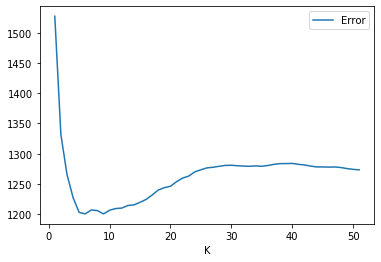

In [38]:
#curve=pd.DataFrame(rmse_val_list)
#curve.plot() # Elbow curve
curve = pd.DataFrame(rmse_val_df).set_index('K')
curve.plot()

### Doing a Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

#number_of_neighbors = range(1,200)
number_of_neighbors = range(1,iter_size)

params = {'n_neighbors':number_of_neighbors}


In [40]:
knn = KNR()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 51)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [41]:
print(model.best_params_)

{'n_neighbors': 9}


### Using the Model to Predict

In [42]:
df_BM_Test = pd.read_csv('knn.csv', header=[0])

print(df_BM_Test.shape)

(8523, 12)


In [43]:
df_BM_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
df_BM_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
print (df_BM_Test["Item_Fat_Content"].unique())
print (df_BM_Test["Item_Type"].unique())
print (df_BM_Test["Outlet_Size"].unique())
print (df_BM_Test["Outlet_Location_Type"].unique())
print (df_BM_Test["Outlet_Type"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [46]:
df_BM_Test["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [47]:
df_BM_Test["Item_Fat_Content"] = df_BM_Test["Item_Fat_Content"].replace(['LF','low fat'],'Low Fat')
df_BM_Test["Item_Fat_Content"] = df_BM_Test["Item_Fat_Content"].replace('reg','Regular')
df_BM_Test["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [48]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean_wt = df_BM_Test['Item_Weight'].mean() #imputing item_weight with mean
df_BM_Test['Item_Weight'].fillna(mean_wt, inplace =True)

mode_Outlet = df_BM_Test['Outlet_Size'].mode() #imputing outlet size with mode
df_BM_Test['Outlet_Size'].fillna(mode_Outlet[0], inplace =True)

df_BM_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [49]:
x_test = df_BM_Test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=False)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [50]:
x_test = pd.get_dummies(x_test)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

In [51]:
x_test_scaled = scaler.fit_transform(x_test)
X_test = pd.DataFrame(x_test_scaled)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8523 non-null   float64
 1   1       8523 non-null   float64
 2   2       8523 non-null   float64
 3   3       8523 non-null   float64
 4   4       8523 non-null   float64
 5   5       8523 non-null   float64
 6   6       8523 non-null   float64
 7   7       8523 non-null   float64
 8   8       8523 non-null   float64
 9   9       8523 non-null   float64
 10  10      8523 non-null   float64
 11  11      8523 non-null   float64
 12  12      8523 non-null   float64
 13  13      8523 non-null   float64
 14  14      8523 non-null   float64
 15  15      8523 non-null   float64
 16  16      8523 non-null   float64
 17  17      8523 non-null   float64
 18  18      8523 non-null   float64
 19  19      8523 non-null   float64
 20  20      8523 non-null   float64
 21  21      8523 non-null   float64
 22  

In [52]:
Y_pred = model.predict(X_test) #make prediction on test set

ValueError: query data dimension must match training data dimension

In [53]:
Y_pred.mean()

NameError: name 'Y_pred' is not defined